# Data Visualization

In [2]:
# import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import the data of benz data set
train_df = pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

### Homework Review

In [6]:
# Try creating a 5*10 data frame
pd.DataFrame(np.zeros((5,10)))

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Try to use a new package in sklearn to classify the iris dataset

In [10]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [9]:
from sklearn import svm, datasets
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

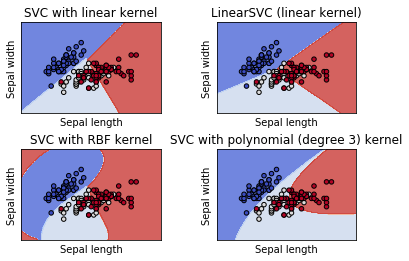

In [11]:
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Summary Statistics Visualization

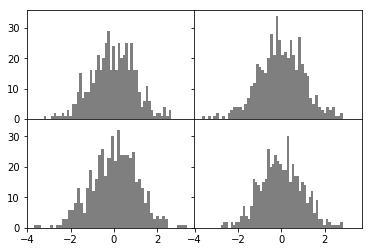

In [5]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
        plt.subplots_adjust(wspace=0, hspace=0)

In [11]:
# get the summary statistics of an ndarray
from scipy import stats
stats.describe(np.random.rand(500))

DescribeResult(nobs=500, minmax=(0.0006713386135797084, 0.9991672591000177), mean=0.4944865065915015, variance=0.08755085132276955, skewness=0.004386315702073505, kurtosis=-1.2646219544695458)

### Outlier Detection

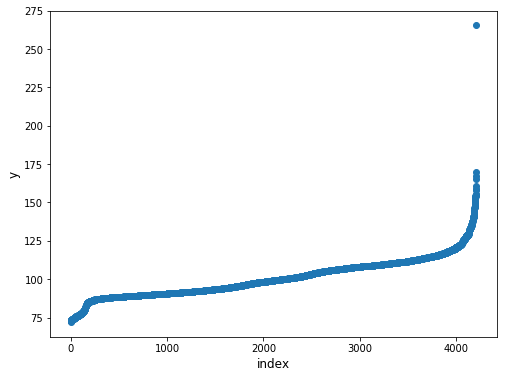

In [12]:
# The example in Benz data set
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.y.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

### Relationship Between Different Variables

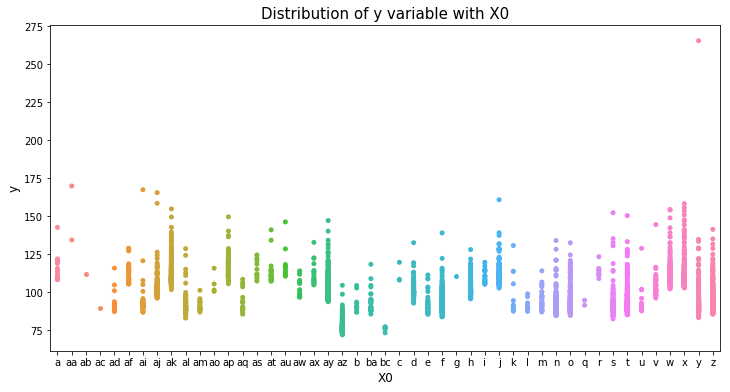

In [42]:
# using sns is much faster than using df.plot.bar()
var_name = "X0"
col_order = np.sort(train_df[var_name].unique()).tolist()
plt.figure(figsize=(12,6))
sns.stripplot(x=var_name, y='y', data=train_df, order=col_order)
plt.xlabel(var_name, fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title("Distribution of y variable with "+var_name, fontsize=15)
plt.show()

### Heatmap

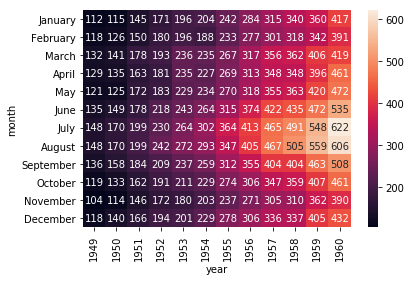

In [20]:
flights = sns.load_dataset("flights")
flights = flights.pivot("month", "year", "passengers")
ax = sns.heatmap(flights, annot=True, fmt="d")

### See the trend

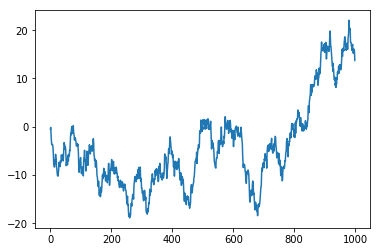

In [15]:
plt.plot(np.random.randn(1000).cumsum())
plt.show()

### Elements of Data Visualization

Text(0.5,1,'A trend line example')

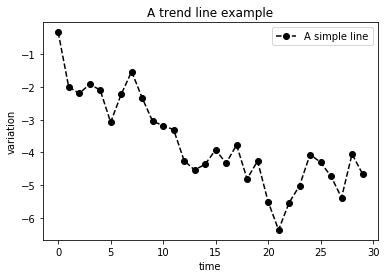

In [33]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o') # set color, points, type
plt.xlabel('time') # set x label
plt.ylabel('variation') # set y label
plt.legend(['A simple line']) # set legend
plt.title('A trend line example')

### Toy Problem

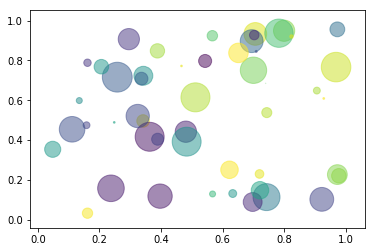

In [35]:
# Try to create a scatter plot between two variables you are interested
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

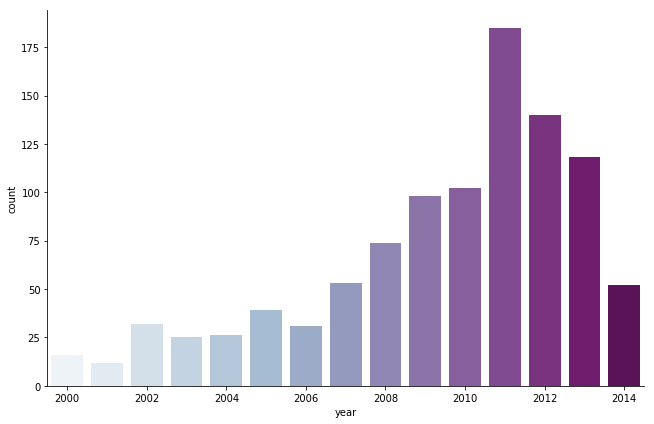

In [39]:
# Try to find the distribution of a variable that doesn’t follow normal distribution
# Load the example planets dataset
planets = sns.load_dataset("planets")

# Make a range of years to show categories with no observations
years = np.arange(2000, 2015)

# Draw a count plot to show the number of planets discovered each year
g = sns.factorplot(x="year", data=planets, kind="count",
                   palette="BuPu", size=6, aspect=1.5, order=years)
g.set_xticklabels(step=2)

# Mercedes Benz Data Visualization

In [ ]:
import pandas as pd
import zipfile
import matplotlib.pyplot as pl
%matplotlib inline

In [ ]:
z = zipfile.ZipFile('../data/train.csv.zip')
print(z.namelist())
train = pd.read_csv(z.open('train.csv'), parse_dates=['Dates'])

In [ ]:
train['Year'] = train['Dates'].map(lambda x: x.year)
train['Week'] = train['Dates'].map(lambda x: x.week)
train['Hour'] = train['Dates'].map(lambda x: x.hour)

print(train.head())

# Plot District rank

In [ ]:
train.PdDistrict.value_counts().plot(kind='bar', figsize=(8,10))
pl.show()

# Plot Case by time

In [ ]:
train['event']=1
weekly_events = train[['Week','Year','event']].groupby(['Year','Week']).count().reset_index()
weekly_events_years = weekly_events.pivot(index='Week', columns='Year', values='event').fillna(method='ffill')

ax = weekly_events_years.interpolate().plot(title='number of cases every 2 weeks', figsize=(10,6))
pl.show()

# Plot case number by hour

In [ ]:
hourly_events = train[['Hour','event']].groupby(['Hour']).count().reset_index()
hourly_events.plot(kind='bar', figsize=(6, 6))

hourly_district_events = train[['PdDistrict','Hour','event']].groupby(['PdDistrict','Hour']).count().reset_index()
hourly_district_events_pivot = hourly_district_events.pivot(index='Hour', columns='PdDistrict', values='event').fillna(method='ffill')
hourly_district_events_pivot.interpolate().plot(title='number of cases hourly by district', figsize=(10,6))
pl.show()

# Crime Density Map

In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as pl
import seaborn as sns

# Supplied map bounding box:
#    ll.lon     ll.lat   ur.lon     ur.lat
#    -122.52469 37.69862 -122.33663 37.82986
mapdata = np.loadtxt("../data/sf_map_copyright_openstreetmap_contributors.txt")
asp = mapdata.shape[0] * 1.0 / mapdata.shape[1]

lon_lat_box = (-122.5247, -122.3366, 37.699, 37.8299)
clipsize = [[-122.5247, -122.3366],[ 37.699, 37.8299]]

z = zipfile.ZipFile('../data/train.csv.zip')
train = pd.read_csv(z.open('train.csv'))

In [2]:
# Get rid of the bad lat/longs
train['Xok'] = train[train.X<-121].X
train['Yok'] = train[train.Y<40].Y
train = train.dropna()
trainP = train[train.Category == 'ARSON'] #Grab the ARSON crimes
train = train #Can't use all the data and complete within 600 sec :(

/root/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


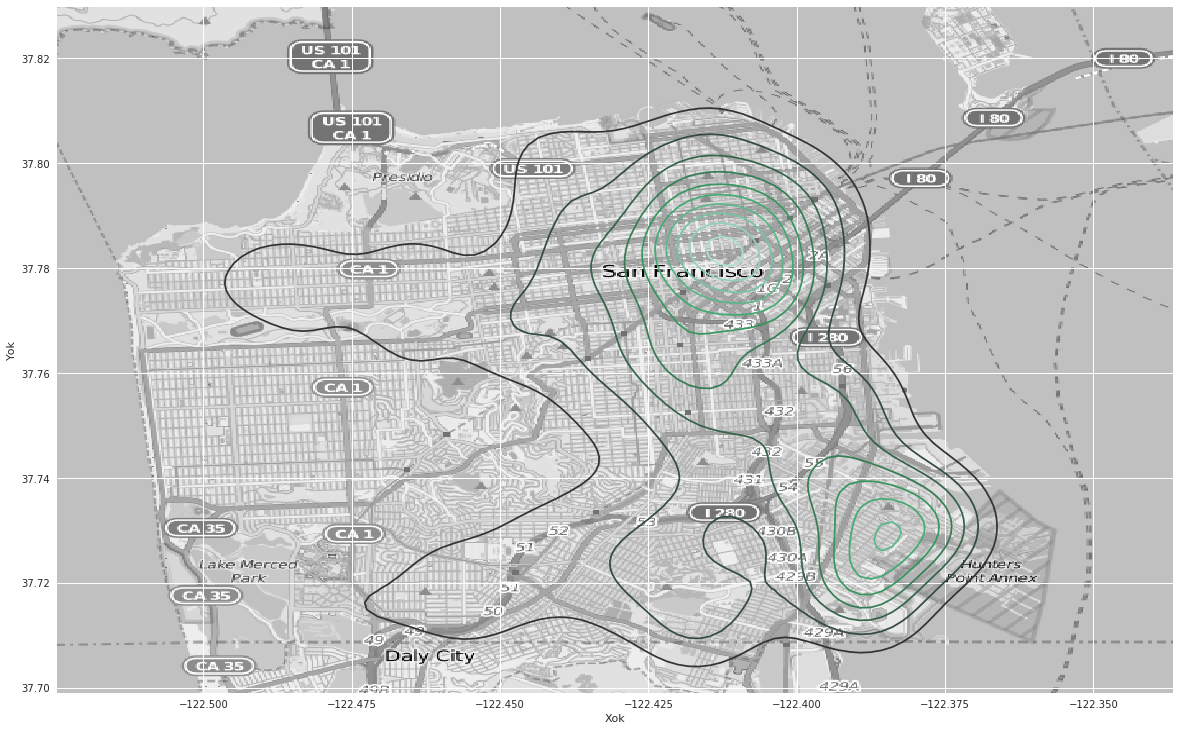

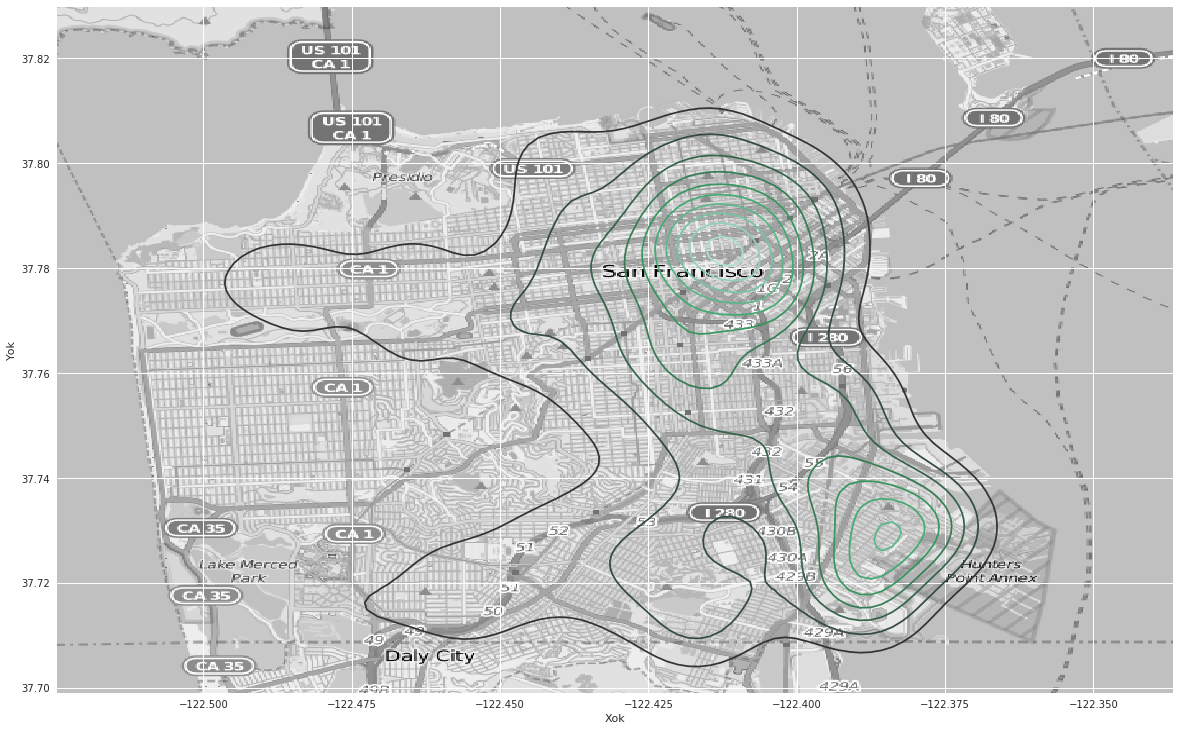

In [4]:
#Do a larger plot with ARSON only
pl.figure(figsize=(20,20*asp))
ax = sns.kdeplot(trainP.Xok, trainP.Yok, clip=clipsize, aspect=1/asp)
ax.imshow(mapdata, cmap=pl.get_cmap('gray'), 
              extent=lon_lat_box, 
              aspect=asp)
pl.show()